In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Function to integrate
def f(x):
    return np.exp(-x)

# True value of the integral (for comparison)
true_value = 1 - np.exp(-1)

# Number of samples
N = 10000

In [3]:
# -----------------------------
# Standard Monte Carlo
# -----------------------------
x_uniform = np.random.uniform(0, 1, N)
I_uniform = np.mean(f(x_uniform))  # uniform weight (b-a)/N = 1 here
print("Standard Monte Carlo Estimate:", I_uniform)
print("Error:", abs(I_uniform - true_value))

Standard Monte Carlo Estimate: 0.6328015073395663
Error: 0.0006809485110086388


In [ ]:
# -----------------------------
# Importance Sampling
# -----------------------------
def p(x):
    return np.exp(-x) / (1 - np.exp(-1))

# Inverse CDF sampling for p(x)
u = np.random.uniform(0, 1, N)
x_importance = 1 - np.sqrt(1 - u)

# Weighted estimate
weights = f(x_importance) / p(x_importance)
I_importance = np.mean(weights)
print("Importance Sampling Estimate:", I_importance)
print("Error:", abs(I_importance - true_value))

Importance Sampling Estimate: 0.6321205588285574
Error: 2.220446049250313e-16


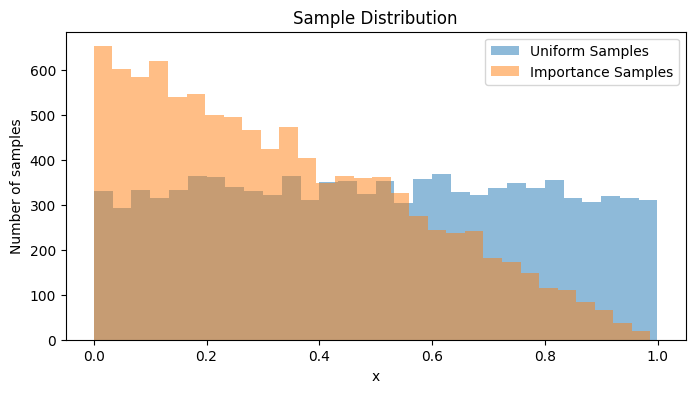

In [11]:
# -----------------------------
# Visualization
# -----------------------------
plt.figure(figsize=(8,4))
plt.hist(x_uniform, bins=30, alpha=0.5, label='Uniform Samples')
plt.hist(x_importance, bins=30, alpha=0.5, label='Importance Samples')
plt.xlabel('x')
plt.ylabel('Number of samples')
plt.title('Sample Distribution')
plt.legend()
plt.show()
